In [15]:
import sys
sys.path.append('../')

import torch
import seaborn as sns
import matplotlib.pyplot as plt

from llama.module.position_embedding import LlamaRotaryEmbedding, rotate_half, apply_rotary_pos_emb

## roatry_half 

In [35]:
x = torch.arange(8)
x, rotate_half(x)

(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([-4, -5, -6, -7,  0,  1,  2,  3]))

## rotary_emb

In [43]:
rotary_emb = LlamaRotaryEmbedding(128, 2048, 10000.0)

In [44]:
kv_seq_len = len(x)
cos, sin = rotary_emb(x, seq_len=kv_seq_len)

Text(0.5, 1.0, 'sin')

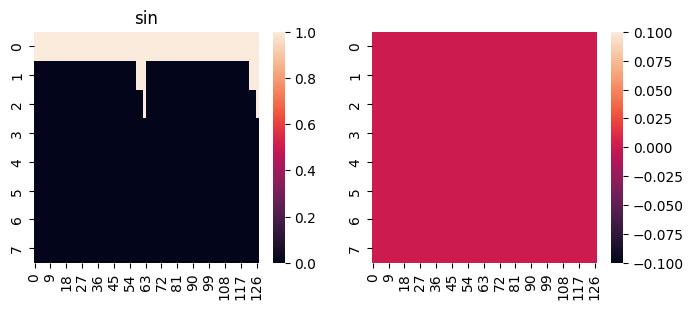

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.heatmap(cos[0, 0], ax=axes[0])
axes[0].set_title('cos')
sns.heatmap(sin[0, 0], ax=axes[1])
axes[0].set_title('sin')

In [46]:
position_ids = [range(4)]
query_states, key_states = apply_rotary_pos_emb(x, x, cos, sin, position_ids)

RuntimeError: The size of tensor a (8) must match the size of tensor b (128) at non-singleton dimension 2

In [40]:
query_states

tensor([[[0, 1, 2, 3, 4, 5, 6, 7]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]]])

In [41]:
key_states

tensor([[[0, 1, 2, 3, 4, 5, 6, 7]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]]])

In [42]:
key_states

tensor([[[0, 1, 2, 3, 4, 5, 6, 7]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0]]])